In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [338]:
datos = pd.read_csv("C:\\Users\\crist\\Documents\\UNIVERSIDAD\\Semestre IX\\MachineLearning\\consignas\\RepoEntregaTres\\df_entrenamiento.csv",
                              delimiter= ",", decimal= ".")


In [379]:
entradas_df_entrenamiento = pd.read_csv("C:\\Users\\crist\\Documents\\UNIVERSIDAD\\Semestre IX\\MachineLearning\\consignas\\RepoEntregaTres\\entradas_df_entrenamiento.csv",
                              delimiter= ",", decimal= ".")


In [539]:
entradas_df_entrenamiento_var = entradas_df_entrenamiento.loc[:,[
                                                                'education_10th',
                                                                'education_11th',
                                                                'education_12th',
                                                                'education_1st-4th',
                                                                'education_5th-6th',
                                                                'education_7th-8th',
                                                                'education_9th',
                                                                'education_Assoc-acdm',
                                                                'education_Assoc-voc',
                                                                'education_Bachelors',
                                                                'education_Doctorate',
                                                                'education_HS-grad',
                                                                'education_Masters',
                                                                'education_Preschool',
                                                                'education_Prof-school',
                                                                'education_Some-college',
                                                                'race_Amer-Indian-Eskimo',
                                                                'race_Asian-Pac-Islander',
                                                                'race_Black',
                                                                'race_Other',
                                                                'race_White',
                                                                'age',
                                                                'hours_per_week'
                                                                ]]

In [487]:
salida_df_entrenamiento = pd.read_csv("C:\\Users\\crist\\Documents\\UNIVERSIDAD\\Semestre IX\\MachineLearning\\consignas\\RepoEntregaTres\\salida_df_entrenamiento.csv",
                              delimiter= ",", decimal= ".")

In [488]:
salida_df_entrenamiento_var = salida_df_entrenamiento["income_<=50K"]

# 7. Norm data

In [546]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(entradas_df_entrenamiento_var)
normalized_entradas_df_entrenamiento_var = min_max_scaler.transform(entradas_df_entrenamiento_var)
normalized_entradas_df_entrenamiento_var = pd.DataFrame(normalized_entradas_df_entrenamiento_var, columns=entradas_df_entrenamiento_var.columns)

# 8. Model build

Se establece el modelo, estudiar **keras.Sequential, las funciones de activacion, y el optimizador, junto con la funcion de perdidad loss**

In [547]:
modelo = keras.Sequential()
modelo.add(layers.Dense(10, activation="tanh", input_shape=[len(normalized_entradas_df_entrenamiento_var.keys()), ]))
modelo.add(layers.Dense(10, activation="softmax", input_shape=[len(normalized_entradas_df_entrenamiento_var.keys()), ]))
modelo.add(layers.Dense(1, activation="sigmoid"))


Se crea el algoritmo

In [548]:
alg_entrenamiento = tf.keras.optimizers.SGD(learning_rate=0.1)
modelo.compile(loss="BinaryCrossentropy", metrics=["mae", "mse", "AUC"], optimizer=alg_entrenamiento)

# 9. Model preview

In [549]:
modelo.summary()

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 10)                240       
                                                                 
 dense_118 (Dense)           (None, 10)                110       
                                                                 
 dense_119 (Dense)           (None, 1)                 11        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


# 10. Model probe

In [550]:
modelo.predict(normalized_entradas_df_entrenamiento_var[1:3])

1/1 [==============================] - 0s 82ms/step


array([[0.52792627],
       [0.51946896]], dtype=float32)

# 11. Model train

In [551]:
history = modelo.fit(
    normalized_entradas_df_entrenamiento_var,
    salida_df_entrenamiento_var,
    epochs=70,
    validation_split = 0.2,
    verbose=1
)

Epoch 1/70
300/300 [==============================] - 3s 6ms/step - loss: 0.6913 - mae: 0.4989 - mse: 0.2491 - auc: 0.5459 - val_loss: 0.6905 - val_mae: 0.4977 - val_mse: 0.2487 - val_auc: 0.6220
Epoch 2/70
300/300 [==============================] - 1s 4ms/step - loss: 0.6843 - mae: 0.4951 - mse: 0.2456 - auc: 0.6293 - val_loss: 0.6790 - val_mae: 0.4916 - val_mse: 0.2430 - val_auc: 0.6882
Epoch 3/70
300/300 [==============================] - 1s 4ms/step - loss: 0.6666 - mae: 0.4842 - mse: 0.2368 - auc: 0.6782 - val_loss: 0.6502 - val_mae: 0.4727 - val_mse: 0.2288 - val_auc: 0.7130
Epoch 4/70
300/300 [==============================] - 1s 4ms/step - loss: 0.6319 - mae: 0.4575 - mse: 0.2202 - auc: 0.7170 - val_loss: 0.6076 - val_mae: 0.4372 - val_mse: 0.2091 - val_auc: 0.7547
Epoch 5/70
300/300 [==============================] - 1s 4ms/step - loss: 0.5941 - mae: 0.4249 - mse: 0.2033 - auc: 0.7617 - val_loss: 0.5725 - val_mae: 0.4062 - val_mse: 0.1939 - val_auc: 0.7847
Epoch 6/70
300/300 [

In [552]:
historico = pd.DataFrame(history.history)
historico["Epochs"] = history.epoch

# 12. Model validation

Text(0.5, 1.0, 'Gráfica de función de error')

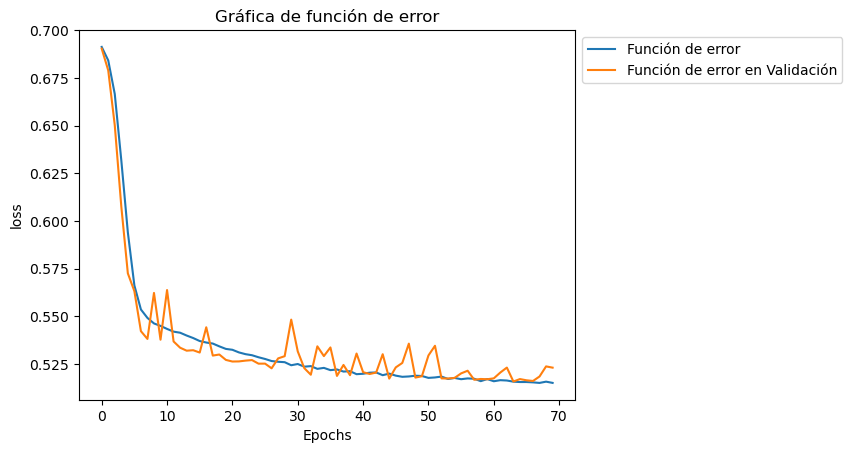

In [553]:
ax001 = sns.lineplot(data=historico, x="Epochs", y="loss", label = "Función de error")
ax001 = sns.lineplot(data=historico, x="Epochs", y="val_loss", label = "Función de error en Validación", ax = ax001)
sns.move_legend(ax001, "upper left", bbox_to_anchor=(1, 1))
plt.title('Gráfica de función de error')

Text(0.5, 1.0, 'Gráfica AUC')

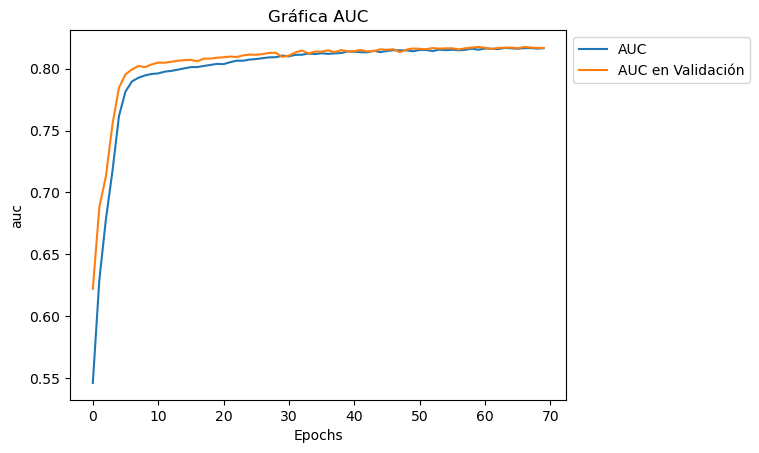

In [554]:
ax002 = sns.lineplot(data=historico, x="Epochs", y="auc", label = "AUC")
ax002 = sns.lineplot(data=historico, x="Epochs", y="val_auc", label = "AUC en Validación", ax = ax002)
sns.move_legend(ax002, "upper left", bbox_to_anchor=(1, 1))
plt.title('Gráfica AUC')

In [555]:
nombre_columnas_categoricas = [
    "workclass",
    "education",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native_country",
    "income"
]

In [557]:
df_pruebas = pd.read_csv("C:\\Users\\crist\\Documents\\UNIVERSIDAD\\Semestre IX\\MachineLearning\\consignas\\RepoEntregaTres\\df_pruebas.csv",
                              delimiter= ",", decimal= ".")

In [560]:
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoder.fit(df_pruebas[nombre_columnas_categoricas])
a = pd.DataFrame(one_hot_encoder.transform(df_pruebas[nombre_columnas_categoricas]), columns=one_hot_encoder.get_feature_names_out())
a.reset_index(drop=True, inplace=True)
b = df_pruebas.select_dtypes(np.number)
b.reset_index(drop=True, inplace=True)

nuevo_df_pruebas = pd.concat([b,a], axis=1)

c:\Users\crist\anaconda3\envs\machine\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [559]:
nuevo_df_pruebas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2994 entries, 0 to 2993
Data columns (total 98 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 2994 non-null   int64  
 1   age                                   2994 non-null   int64  
 2   hours_per_week                        2994 non-null   int64  
 3   workclass_Federal-gov                 2994 non-null   float64
 4   workclass_Local-gov                   2994 non-null   float64
 5   workclass_Private                     2994 non-null   float64
 6   workclass_Self-emp-inc                2994 non-null   float64
 7   workclass_Self-emp-not-inc            2994 non-null   float64
 8   workclass_State-gov                   2994 non-null   float64
 9   workclass_Without-pay                 2994 non-null   float64
 10  education_10th                        2994 non-null   float64
 11  education_11th   

# Validacion con el dataset de pruebas el modelo 